In [1]:
projectName = '2020_02_03_multicondition1/'

mainFolder = '../../pipeline/' + projectName + '/'
modelFolder = '../../src/modeling/'

import matplotlib.pyplot as plt # plotting
plt.style.use('ggplot')

import numpy as np # linear algebra
import pandas as pd

# make objects from folders below importable

import sys
sys.path.append(mainFolder) # contains 'pipeline' for fetching, processing and saving data, models etc...
from pipeline import ModelPipeline

sys.path.append(modelFolder) # contains 'models' like CNN, LTSM, MLP etc...
#from models import CNN_clf, CNN_clf_small, CNN_clf_tiny, CNN_clf_huge

In [2]:
pipeline = ModelPipeline()
X = pipeline.fetchProcessedData('X_0')['X_0']
y = pipeline.fetchProcessedData('y_0')['y_0']

from sklearn.preprocessing import MinMaxScaler
for i in range(len(X[0,0,:])):
    scaler = MinMaxScaler()
    X[:,:,i] = scaler.fit_transform(X[:,:,i])

In [4]:
pipeline = ModelPipeline()
X = pipeline.fetchProcessedData('X_1')['X_1']
y = pipeline.fetchProcessedData('y_1')['y_1']

from sklearn.preprocessing import MinMaxScaler
for i in range(len(X[0,0,:])):
    scaler = MinMaxScaler()
    X[:,:,i] = scaler.fit_transform(X[:,:,i])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
del X, y

In [4]:
#X_train += np.random.normal(0, 0.05, np.shape(X_train))
X_train.shape

(13056, 200, 70)

([<matplotlib.lines.Line2D at 0x7f2ca1c79a10>],
 [<matplotlib.lines.Line2D at 0x7f2ca1c6ef50>])

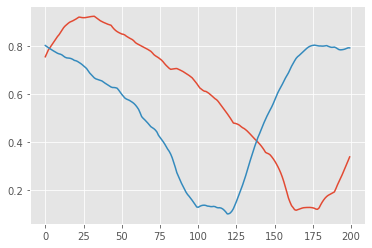

In [5]:
plt.plot(X_train[4,:,21]),plt.plot(X_train[0,:,23])

In [6]:
from classifier import CNN_reg, lstm_pooling_reg
model = CNN_reg(feature_dim=(200,70), output_dim=3) #(50 delay-steps, 70 channel)
#model = lstm_pooling_reg(feature_dim=(200,70), output_dim=3) #(50 delay-steps, 70 channel)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 70)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 32)           6752      
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 32)           128       
_________________________________________________________________
activation (Activation)      (None, 198, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 32)           3104      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 32)           128       
_________________________________________________________________
activation_1 (Activation)    (None, 196, 32)           0     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=32)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(X_train, y_train, 
        epochs=32, 
        batch_size=128, 
        verbose=1, 
        callbacks=[es, mc],
        validation_data=(X_test, y_test))
    
#acc_train = model.evaluate(X_train, y_train.astype(float), verbose=0)[1]
#acc_test = model.evaluate(X_test, y_test.astype(float), verbose=0)[1]

#print('{}, {}'.format(acc_train, acc_test))

In [9]:
model.fit(X_train, y_train, 
        epochs=128, 
        batch_size=128, 
        verbose=1, 
        callbacks=[es, mc],
        validation_data=(X_test, y_test))

Train on 9375 samples, validate on 3125 samples
Epoch 1/128
9375/9375 [==============================] - 8s 888us/sample - loss: 27.4897 - mse: 27.4897 - mae: 4.0974 - val_loss: 127.5408 - val_mse: 127.5408 - val_mae: 8.9520
Epoch 2/128
9375/9375 [==============================] - 8s 884us/sample - loss: 26.2255 - mse: 26.2255 - mae: 4.0117 - val_loss: 346.3912 - val_mse: 346.3912 - val_mae: 14.7873
Epoch 3/128
9375/9375 [==============================] - 8s 880us/sample - loss: 26.9604 - mse: 26.9604 - mae: 4.0734 - val_loss: 204.7651 - val_mse: 204.7651 - val_mae: 11.3937
Epoch 4/128
9375/9375 [==============================] - 8s 885us/sample - loss: 26.6118 - mse: 26.6118 - mae: 4.0422 - val_loss: 150.2446 - val_mse: 150.2446 - val_mae: 9.5490
Epoch 5/128
9375/9375 [==============================] - 8s 888us/sample - loss: 27.0959 - mse: 27.0959 - mae: 4.0718 - val_loss: 108.8752 - val_mse: 108.8752 - val_mae: 8.2408
Epoch 6/128
9375/9375 [==============================] - 8s 884us

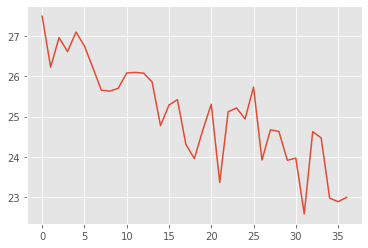

In [10]:
#np.sum(np.abs(model.predict(X_test) - y_test), axis=1)/3
plt.plot(model.history.history['loss'])

In [11]:
model.predict(X_test[:16])

array([[-19.761553  ,  16.870857  ,  67.67226   ],
       [-19.031187  ,   1.5312113 ,  71.87959   ],
       [-22.416454  , -12.653296  ,  57.066998  ],
       [-15.24878   ,  -6.1563573 ,  51.820415  ],
       [ 11.971559  ,  21.65259   ,  59.528072  ],
       [  7.593353  ,  11.67434   ,  47.081173  ],
       [-16.393274  , -16.51816   ,  58.531467  ],
       [ 17.058538  , -20.578274  ,  69.95772   ],
       [ 22.96641   , -14.066607  ,  61.27641   ],
       [  8.763729  , -10.529317  ,  81.194466  ],
       [ -2.3541873 ,   3.2109075 ,  37.187733  ],
       [ 30.482742  ,  -4.4868045 ,  62.32912   ],
       [ 33.72763   ,   1.8774031 ,  65.900986  ],
       [ 14.46361   , -15.152234  ,  77.244934  ],
       [ 13.204099  ,  -9.7790985 ,  52.990623  ],
       [ -4.903926  ,  -0.25734344,  64.231224  ]], dtype=float32)

In [12]:
y_test[:16]

array([[-16.9132843 ,  11.94986343,  82.31227112],
       [-22.43943977,  -2.27230072,  86.5664978 ],
       [-18.33136177, -26.31790543,  73.80380249],
       [ -6.0722084 , -22.58423805,  59.42610168],
       [ 25.62902832,  18.27971649,  72.38572693],
       [ 21.37480164,  15.89753723,  61.04111481],
       [-15.49520683, -30.34527588,  76.63996124],
       [ 21.72952271, -36.30615234,  79.47612   ],
       [ 23.50191498, -15.74403381,  71.67033386],
       [ 10.5973587 , -17.87115097,  99.32919312],
       [ 14.28441238,   9.07231522,  42.32693481],
       [ 41.01675034,  -7.9446106 ,  82.31227112],
       [ 38.28185272,   6.23616028,  86.5664978 ],
       [ 27.04710388, -24.9615345 ,  96.16000366],
       [ 14.28441238, -17.87115097,  71.34634399],
       [ -4.1505909 ,  -7.9446106 ,  79.35051727]])